This is an attempt to recreate the Data Science homework that I completed 6 years ago. I will be re-doing everything within both R and Python to demonstrate versatility and differences between the two programs. 

For this, I will be downloading the UBSprices dataset from the ALR4 package. I will look at the summary statistics first to see fi there any any potential transformations that may be had. 


In [21]:
from rdatasets import data
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smplot
from io import StringIO



url = "http://users.stat.umn.edu/~sandy/alr4ed/data/UBSprices.csv"
UBSprices = pd.read_csv(url)
UBSprices.describe(include="all")


,Unnamed: 0,bigmac2009,bread2009,rice2009,bigmac2003,bread2003,rice2003
count,54,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
unique,54,NaN,NaN,NaN,NaN,NaN,NaN
top,Rome,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,35.351852,23.018519,22.342593,36.740741,21.500000,19.462963
std,NaN,30.603463,15.863201,14.763808,31.610355,14.385199,14.645127
min,NaN,12.000000,8.000000,8.000000,10.000000,6.000000,5.000000
25%,NaN,17.250000,13.000000,11.000000,16.500000,12.000000,12.000000
50%,NaN,25.500000,19.000000,17.000000,22.000000,18.000000,16.000000
75%,NaN,42.000000,25.750000,26.500000,47.000000,25.000000,22.000000


Now looking at the head of the data, we have 6 variables that deal with the prices of items depending on the year and country. 

In [22]:
UBSprices.head()

,Unnamed: 0,bigmac2009,bread2009,rice2009,bigmac2003,bread2003,rice2003
0,Amsterdam,19,10,11.0,16,9,9
1,Athens,30,13,27.0,21,12,19
2,Auckland,19,19,13.0,19,19,9
3,Bangkok,45,43,27.0,50,42,25
4,Barcelona,21,17,8.0,22,19,10


Now to plot bigmac2009 against bigmac2003

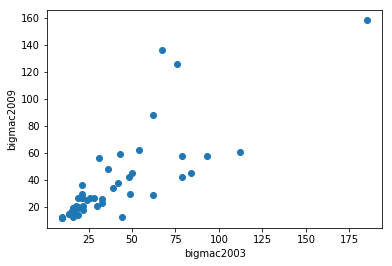

In [23]:
plt.figure()
plt.scatter(UBSprices["bigmac2003"], UBSprices["bigmac2009"])
plt.xlabel("bigmac2003")
plt.ylabel("bigmac2009")
plt.show()


looking at the plot, there seems to be a significant case of non-constant variance. Not only that, looking back at the summary statistics, we may have ranges that go over more than one order, so we will add log transformation in the predictor variable as well as the resposne. We will fit a regression line in red to see how well it fits the data. 

In [24]:
X_int = sm.add_constant(np.log(UBSprices["bigmac2003"]))
X = np.log(UBSprices["bigmac2003"])
Y = np.log(UBSprices["bigmac2009"])
pricesmodel = sm.OLS(Y,X_int).fit()
Yhat = pricesmodel.predict(X_int)

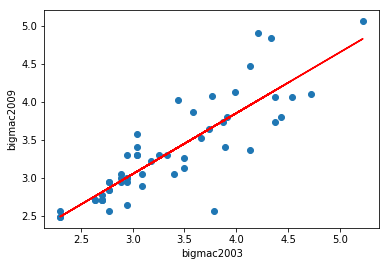

In [25]:
plt.figure()
plt.scatter(np.log(UBSprices["bigmac2003"]), np.log(UBSprices["bigmac2009"]))
plt.plot(X, Yhat, color ='red', label="OLS fit")
plt.xlabel("bigmac2003")
plt.ylabel("bigmac2009")
plt.show()

The log transformations seems to have significantly fixed the variances of the data to a more homoscedastic one. The red line from the regression that we fit, seems to fig the data pretty well. Now it is time to read the variable and see what it tells us. 

In [26]:
pricesmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bigmac2009   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.48e-16
Time:                        17:44:15   Log-Likelihood:                -16.121
No. Observations:                  54   AIC:                             36.24
Df Residuals:                      52   BIC:                             40.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6403      0.229      2.793      0.007       0.180       1.100
bigmac2003     0.8029      0.067     11.967      0.000       0.668       0.938
==============================================================================
Omnibus:                        6.086   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                9.298
Skew:                          -0.072   Prob(JB):                      0.00957
Kurtosis:                       5.028   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the summary of the model, when there are no units for the measure of the log of bigmac2003 or minutes of labor recorded, the log minutes of bigmac2009 will be .64. If there is a 1 minute unit increase on the log of bigmac2003, then the log of bigmac2009 will increase by .80%. The log of bigmac2003 seems to be significant as well as we fail to reject the null at any criterion level other than 0. 


For the next problem, we will be looking at the oldfaith data set. We are going to see the relationship between the Interval between eruptions of geysers and if they are related to the Duration of each eruption. First, as always, we will do exploratory data exploration before fitting the model. 


In [27]:
url2 = "http://users.stat.umn.edu/~sandy/alr4ed/data/oldfaith.csv" 
oldfaith = pd.read_csv(url2)
oldfaith.head()

,Unnamed: 0,Duration,Interval
0,1,216,79
1,2,108,54
2,3,200,74
3,4,137,62
4,5,272,85


We see we only have two variables, Now let's look at the summary statistics to see if there are any possible transformations we need to perform. 

In [28]:
oldfaith.describe(include="all")

,Unnamed: 0,Duration,Interval
count,270.000000,270.000000,270.000000
mean,135.500000,209.877778,71.107407
std,78.086491,68.392128,13.498986
min,1.000000,96.000000,43.000000
25%,68.250000,130.000000,58.000000
50%,135.500000,240.000000,76.000000
75%,202.750000,267.750000,82.000000
max,270.000000,306.000000,96.000000


Nothing seems out of the ordinary, but we may need to do a transformation on the duration variable as its range seems to cover two orders. 


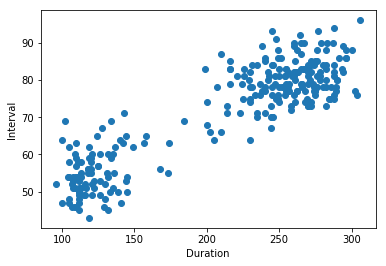

In [29]:
plt.figure()
plt.scatter(oldfaith["Duration"], oldfaith["Interval"])
plt.xlabel("Duration")
plt.ylabel("Interval")
plt.show()

In [30]:
oldfaith_x = sm.add_constant(oldfaith["Duration"])
oldfaithmodel = sm.OLS(oldfaith["Interval"],oldfaith_x).fit() 
oldfaithmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Interval   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1092.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.62e-96
Time:                        17:44:17   Log-Likelihood:                -866.04
No. Observations:                 270   AIC:                             1736.
Df Residuals:                     268   BIC:                             1743.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9878      1.181     28.774      0.000      31.662      36.313
Duration       0.1769      0.005     33.045      0.000       0.166       0.187
==============================================================================
Omnibus:                        5.126   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                5.038
Skew:                           0.295   Prob(JB):                       0.0806
Kurtosis:                       2.685   Cond. No.                         714.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the summary of the model, Duration seems to be a significant variable in relation to the Interval of a geyser eruption. It says that for every 1 second increase in the duration of an eruption, the interval between eruptions increase by .18. Now we will create predictions intervals using this model. We will predict on the mean using confidence intervals and then we will predict on actual data points. We will predict where a duration of 20 seconds will land us. 


In [31]:

grid2 = pd.DataFrame({"const": [1.0], "Duration" : [250]})

oldfaithmodel.get_prediction(grid2).summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,78.203541,0.423797,77.369146,79.037936,66.354008,90.053075


Here we can see that the interval is between 66.35 and 90.05 with the prediction at 78.203. Now lets do a prediction within the confines of the mean model itself. 

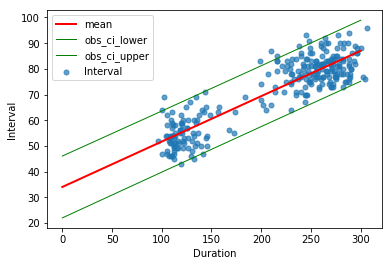

In [32]:
grid3 = np.arange(0,301,1)
oldfaith_seq = sm.add_constant(grid3)
preds = oldfaithmodel.get_prediction(oldfaith_seq).summary_frame(alpha=0.05)

plt.figure(figsize=(6,4))
plt.scatter(oldfaith["Duration"], oldfaith["Interval"], s=25, alpha = 0.7)
plt.plot(grid3, preds["mean"], linewidth=2, color="red") 
plt.plot(grid3, preds["obs_ci_lower"], linewidth=1, color="green")
plt.plot(grid3, preds["obs_ci_upper"], linewidth=1, color="green")
plt.xlabel("Duration")
plt.ylabel("Interval")
plt.legend()
plt.show()

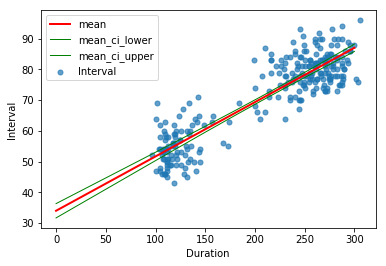

In [33]:
grid4 = np.arange(0,301,1) 
oldfaith_seq2 = sm.add_constant(grid4)
preds2 = oldfaithmodel.get_prediction(oldfaith_seq2).summary_frame(alpha=0.05)

plt.figure(figsize=(6,4))
plt.scatter(oldfaith["Duration"], oldfaith["Interval"], s=25, alpha=0.7)
plt.plot(grid4, preds2["mean"], linewidth=2, color="red")
plt.plot(grid4, preds2["mean_ci_lower"], linewidth=1, color="green")
plt.plot(grid4, preds2["mean_ci_upper"], linewidth=1, color="green")
plt.xlabel("Duration")
plt.ylabel("Interval")
plt.legend()
plt.show()

Here we see that our prediction falls at 78.203 seconds again, however since we are only predicting the range of the mean, it is a smaller range of between 77.37 and 79.04 seconds. We can see that the prediction within confidence is more tight and robust becasue the variance on the mean is much less than the variance on data point we have never seen. I can confidently say that I would tell a customer that, with 95% confidence, the interval for a geyser that erupted for 250 seconds will fall between 77.37 and 79.04 minutes before the next eruption on average, but the actual interval can be anywhere between 66.35 to 90.05 minutes. 

For our next problem, we will be looking at UN data to look at fertility as the response to a linear relationship. Fertility, in this context, is the amount of children per woman. We will also be using ppgd in log form as well as the percent of urban area ina  society. 

In [34]:
url3 = "http://users.stat.umn.edu/~sandy/alr4ed/data/UN11.csv"

In [35]:
UN11 = pd.read_csv(url3)

UN11.head()

,Unnamed: 0,region,group,fertility,ppgdp,lifeExpF,pctUrban
0,Afghanistan,Asia,other,5.968,499.0,49.49,23
1,Albania,Europe,other,1.525,3677.2,80.40,53
2,Algeria,Africa,africa,2.142,4473.0,75.00,67
3,Angola,Africa,africa,5.135,4321.9,53.17,59
4,Anguilla,Caribbean,other,2.000,13750.1,81.10,100


In [36]:
UN11.describe(include="all")

,Unnamed: 0,region,group,fertility,ppgdp,lifeExpF,pctUrban
count,199,199,199,199.000000,199.000000,199.000000,199.000000
unique,199,8,3,NaN,NaN,NaN,NaN
top,Netherlands,Africa,other,NaN,NaN,NaN,NaN
freq,1,53,115,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.761383,13011.951759,72.293193,57.929648
std,NaN,NaN,NaN,1.339589,18412.443368,10.123784,23.429565
min,NaN,NaN,NaN,1.134000,114.800000,48.110000,11.000000
25%,NaN,NaN,NaN,1.753500,1282.950000,65.660000,39.000000
50%,NaN,NaN,NaN,2.262000,4684.500000,75.890000,59.000000
75%,NaN,NaN,NaN,3.544500,15520.500000,79.585000,75.000000


Just looking at the variables we have, we can already see that ppgdp will cause us problems if we do not transform for it as it goes over several orders. 


In [37]:
UN11["logppgdp"] = np.log(UN11["ppgdp"])
UN11.shape

(199, 8)

In [38]:
X = UN11[["logppgdp", "pctUrban"]]
Y = UN11["fertility"]
X_UN = sm.add_constant(X)
fertilityfit = sm.OLS(Y,X_UN).fit()
fertilityfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fertility   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     106.2
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           5.80e-32
Time:                        17:44:22   Log-Likelihood:                -267.02
No. Observations:                 199   AIC:                             540.0
Df Residuals:                     196   BIC:                             549.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9933      0.399     20.016      0.000       7.206       8.781
logppgdp      -0.6151      0.064     -9.588      0.000      -0.742      -0.489
pctUrban      -0.0004      0.004     -0.103      0.918      -0.009       0.008
==============================================================================
Omnibus:                        5.669   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.289
Skew:                           0.370   Prob(JB):                       0.0711
Kurtosis:                       3.299   Cond. No.                         385.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the coefficients of the model that we have fit, it seems as if the the log of ppgdp is significant, where else the p value for pctUrban shows that it is not significant. Both show negative relationships to the response variable as well. For the log of ppggd, it tells us that for a 1% increase in the log of ppgd associates with a decrease of .00615 in the fertility per woman. If the pctUrban amounted to anything, it would say that for every unit increase of the pctUrban variable results in a decrease of .00044 of fertility per woman. Let's look at the av plots as well to further confirm what the summary is telling us. The avPlots tell us, with all other variables in the model, does this model explain any other variation.


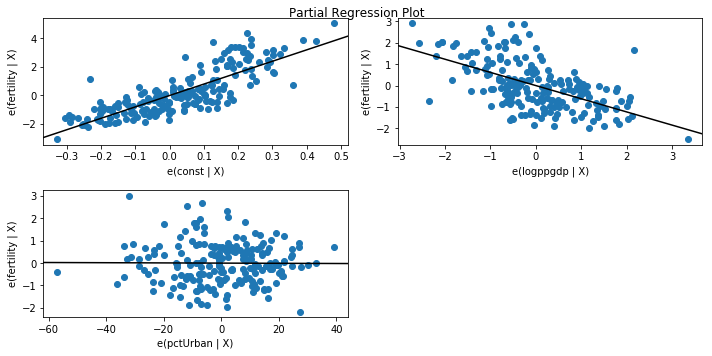

In [39]:
fig = plt.figure(figsize=(10,5))
smplot.plot_partregress_grid(fertilityfit, fig=fig)
plt.show()

We see that the the pctUrban has a flat slope, meaning it explains hardly any other variations with the other variables in the model taken into account. This agrees with the p-value that we saw. 


The next problem we are going to look at transaction data where time will be the response. We will do some data wrangling to look at different combinations of transactions and how they relate to time. 

In [40]:
url4 = "https://www.stat.auckland.ac.nz/~wild/data/Rdatasets/csv/car/Transact.csv"

Transact = pd.read_csv(url4)

In [41]:
Transact["a"] = (Transact["t1"] + Transact["t2"])/2
Transact["d"] = Transact["t1"] - Transact["t2"]  
Transact.head()

,t1,t2,time,a,d
0,0,1166,2396,583.0,-1166
1,0,1656,2348,828.0,-1656
2,0,899,2403,449.5,-899
3,516,3315,13518,1915.5,-2799
4,623,3969,13437,2296.0,-3346


In [42]:
Transact.describe(include="all")

,t1,t2,time,a,d
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,281.214559,2421.701149,6607.448276,1351.457854,-2140.486590
std,257.084437,1180.731352,3774.047591,694.376260,995.893722
min,0.000000,148.000000,487.000000,78.500000,-5315.000000
25%,85.000000,1516.000000,3618.000000,825.500000,-2825.000000
50%,214.000000,2192.000000,5583.000000,1199.500000,-1973.000000
75%,437.000000,3175.000000,8712.000000,1763.000000,-1380.000000
max,1450.000000,5791.000000,20741.000000,3316.500000,-139.000000


So, we went ahead and created two new variables, one is the average of the transaction 1 and 2, and the other is the difference between those same variables. The average is under variable "a" and the difference is under variable "d". Looking at the summary statistics, it seems as if we may need to so some transformation, but for this purpose we will ignore that for now. 

We will start off by fitting four different models to compare using these variables. 


In [43]:
Y = Transact["time"]
firstX = Transact[["t1", "t2"]]
firstX = sm.add_constant(firstX)
firstfit = sm.OLS(Y,firstX).fit()
firstfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1289.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.82e-135
Time:                        17:44:38   Log-Likelihood:                -2206.5
No. Observations:                 261   AIC:                             4419.
Df Residuals:                     258   BIC:                             4430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.3694    170.544      0.847      0.398    -191.466     480.205
t1             5.4621      0.433     12.607      0.000       4.609       6.315
t2             2.0345      0.094     21.567      0.000       1.849       2.220
==============================================================================
Omnibus:                       43.242   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.008
Skew:                           0.486   Prob(JB):                     3.08e-50
Kurtosis:                       7.475   Cond. No.                     6.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see the summary of the model, but before looking into that, let's go ahead and fit several other models and see what insights they give us. 

In [44]:
secondX = Transact[["a", "d"]]
secondX = sm.add_constant(secondX)
secondfit = sm.OLS(Y,secondX).fit()
secondfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1289.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.82e-135
Time:                        17:44:38   Log-Likelihood:                -2206.5
No. Observations:                 261   AIC:                             4419.
Df Residuals:                     258   BIC:                             4430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.3694    170.544      0.847      0.398    -191.466     480.205
a              7.4966      0.365     20.514      0.000       6.777       8.216
d              1.7138      0.255      6.726      0.000       1.212       2.216
==============================================================================
Omnibus:                       43.242   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.008
Skew:                           0.486   Prob(JB):                     3.08e-50
Kurtosis:                       7.475   Cond. No.                     6.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next I will use t2 and the d.

In [45]:
thirdX = Transact[["t2", "d"]]
thirdX = sm.add_constant(thirdX)
thirdfit = sm.OLS(Y,thirdX).fit()
thirdfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1289.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.82e-135
Time:                        17:44:38   Log-Likelihood:                -2206.5
No. Observations:                 261   AIC:                             4419.
Df Residuals:                     258   BIC:                             4430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.3694    170.544      0.847      0.398    -191.466     480.205
t2             7.4966      0.365     20.514      0.000       6.777       8.216
d              5.4621      0.433     12.607      0.000       4.609       6.315
==============================================================================
Omnibus:                       43.242   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.008
Skew:                           0.486   Prob(JB):                     3.08e-50
Kurtosis:                       7.475   Cond. No.                     8.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

lastly, we will try to fit all of the variables. 

In [46]:
fourthX = Transact[["t1", "t2", "a", "d"]]
fourthX = sm.add_constant(fourthX)
fourthfit = sm.OLS(Y,fourthX).fit()
fourthfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1289.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.82e-135
Time:                        17:44:38   Log-Likelihood:                -2206.5
No. Observations:                 261   AIC:                             4419.
Df Residuals:                     258   BIC:                             4430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.3694    170.544      0.847      0.398    -191.466     480.205
t1             3.0701      0.205     14.995      0.000       2.667       3.473
t2             1.9276      0.047     41.254      0.000       1.836       2.020
a              2.4989      0.122     20.514      0.000       2.259       2.739
d              1.1425      0.170      6.726      0.000       0.808       1.477
==============================================================================
Omnibus:                       43.242   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.008
Skew:                           0.486   Prob(JB):                     3.08e-50
Kurtosis:                       7.475   Cond. No.                     2.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.67e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can also compare the coefficients in one table.

In [47]:
def compare_coefs(*models):
    tables = []
    names = []
    
    for i, model in enumerate(models, start=1):
        params = model.params
        ses = model.bse
        
        df = pd.DataFrame({
            f"Model {i} coef": params,
            f"Model {i} SE": ses
        })
        
        tables.append(df)
        names.append(f"Model {i}")
        
    result = pd.concat(tables, axis=1)
    return result


compare_coefs(firstfit, secondfit, thirdfit, fourthfit)

C:\Users\19194\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Model 1 coef,Model 1 SE,Model 2 coef,Model 2 SE,Model 3 coef,Model 3 SE,Model 4 coef,Model 4 SE
a,NaN,NaN,7.496605,0.365442,NaN,NaN,2.498868,0.121814
const,144.369443,170.544103,144.369443,170.544103,144.369443,170.544103,144.369443,170.544103
d,NaN,NaN,1.713754,0.254801,5.462057,0.433268,1.142503,0.169867
t1,5.462057,0.433268,NaN,NaN,NaN,NaN,3.070120,0.204747
t2,2.034549,0.094337,NaN,NaN,7.496605,0.365442,1.927617,0.046726


As you can see, there are several variables that have their parameters missing or "aliased" in the fourth model. This is due to some of the variables already being accounted for, especially the ones in which we created that are used in the fourth model. The differences and averages are already captured in the t1 and t2 variables which makes the a and d variables redundant.

For the last demonstration, we are going to use the UN11 data again. This time we will turn the response, fertility, into a log-transformed variable. We are going to use log of ppgdp as well to determine if it describes the relationship well. 

In [49]:
UN11["logfertility"] = np.log(UN11["fertility"])
UN11.head()

,Unnamed: 0,region,group,fertility,ppgdp,lifeExpF,pctUrban,logppgdp,logfertility
0,Afghanistan,Asia,other,5.968,499.0,49.49,23,6.212606,1.786412
1,Albania,Europe,other,1.525,3677.2,80.40,53,8.209907,0.421994
2,Algeria,Africa,africa,2.142,4473.0,75.00,67,8.405815,0.761740
3,Angola,Africa,africa,5.135,4321.9,53.17,59,8.371450,1.636080
4,Anguilla,Caribbean,other,2.000,13750.1,81.10,100,9.528801,0.693147


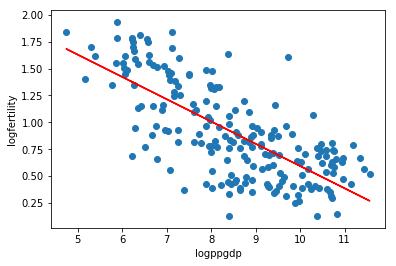

In [53]:
Ylog = UN11["logfertility"]
Xlog = UN11["logppgdp"]
Xlog = sm.add_constant(Xlog)
logUN11fit = sm.OLS(Ylog, Xlog).fit()
ylog_hat = logUN11fit.predict(Xlog)

plt.figure()
plt.scatter(UN11["logppgdp"], UN11["logfertility"])
plt.plot(UN11["logppgdp"], ylog_hat, label = "fit", color="red")
plt.xlabel("logppgdp")
plt.ylabel("logfertility")
plt.show()

Here we see a negative relationship between the log of fertility and the log of ppgdp. Let's look at the summary of the fit we just made.

In [54]:
logUN11fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logfertility   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     218.6
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           9.06e-34
Time:                        17:52:57   Log-Likelihood:                -46.435
No. Observations:                 199   AIC:                             96.87
Df Residuals:                     197   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6655      0.121     22.108      0.000       2.428       2.903
logppgdp      -0.2071      0.014    -14.785      0.000      -0.235      -0.180
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.148
Skew:                          -0.151   Prob(JB):                        0.563
Kurtosis:                       2.782   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just as before, the summary confirms the negative relationship between the sole predictor and the response. for every 1% increase of logppgdp, a .21% reduction in the log of ppgdp is observed. We also see a significant p-value for the log of ppgdp. 